# **菊安酱与菜菜的Python机器学习可视化**

## 第七期 变化图

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第七章 变化图 Change**

变化图是描述数据变化的图像，基本是以折线图的形式进行展现，并且横坐标常常是时间<br>
折线图是最常见的可视化图像之一，它代码简单解读也非常简单，甚至我们可以使用Excel来绘制它  
但它其实可以有很多不同的变体：多个坐标轴，为曲线上色，叠加曲线的面积等等……<br>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/07%20change.PNG" align="center" />

><img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E6%83%8A%E5%8F%B9.PNG" align="center" />   
>注意，在本章之中图像的顺序会和50图原博客中的顺序不太一致。我们将先讲解41，44号图像，因为他们使用了一致的数据集。  
>然后我们再讲解43，45和46号图，他们都是与普通折线图比起来，改变了一些性质来表现出更多信息的图像。  
>最后我们会讲解42号图像，这是一张基于统计学知识来补充折线图的图像。

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 43/50 堆积的面积图

堆积面积图可以直观地显示多个时间点下的不同属性的贡献程度和波动情况，它是一种组成图和变化图的结合。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/43%20-%20.PNG" align="center" />

横坐标：年份  
纵坐标：夜晚到访人数  
颜色：澳大利亚不同的城市

### 1. 导入需要的模块和库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 认识绘制叠加面积图的函数

#### ax.stackplot

> 重要参数：  
>> x: 图像的横坐标   
>> y: 所有需要叠加在一起的图像的纵坐标，注意其结构必须与x相对应。例如。如果x为100个样本，则y必须是[n,100]的结构，n>=1

In [3]:
x = [1,2,3,4,5]

In [4]:
y = [1,1,2,2,2]
#y = [[1,1,2,2,2],[3,7,5,2,9]]

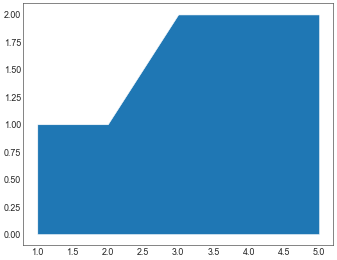

In [5]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=40)
ax.stackplot(x, y);

### 3. 导入数据，准备数据

In [6]:
#导入数据：澳大利亚城市夜间来访者数据
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')

In [50]:
df.shape

df.head()

,年月,悉尼,新南威尔士,墨尔本,维多利亚,布里斯班,昆士兰,各州首府,其他
0,Jan 1998,7320,21782,4865,14054,9055,8016,9178,10232
1,Apr 1998,6117,16881,4100,8237,5616,8461,6362,9540
2,Jul 1998,6282,13495,4418,6731,8298,13175,7965,12385
3,Oct 1998,6368,15963,5157,7675,6674,9092,6864,13098
4,Jan 1999,6602,22718,5550,13581,9168,10224,8908,10140


In [8]:
name = ["年月","悉尼","新南威尔士","墨尔本","维多利亚","布里斯班","昆士兰","各州首府","其他"]

df.columns = name

#确定颜色
mycolors = [plt.cm.autumn(i/7) for i in range(7)]      

#确定需要输入的数据与列名
columns = df.mean(axis=0).sort_values().index
y = df.loc[:,columns]

In [9]:
y.head()

,墨尔本,悉尼,各州首府,布里斯班,维多利亚,其他,昆士兰,新南威尔士
0,4865,7320,9178,9055,14054,10232,8016,21782
1,4100,6117,6362,5616,8237,9540,8461,16881
2,4418,6282,7965,8298,6731,12385,13175,13495
3,5157,6368,6864,6674,7675,13098,9092,15963
4,5550,6602,8908,9168,13581,10140,10224,22718


In [10]:
#确定需要的横坐标

x = df.loc[:,"年月"].values.tolist()

### 4. 绘制图像

In [54]:
#建立画布
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)

#绘制图像
ax.stackplot(x, y.T, labels=columns, colors=mycolors, alpha=0.7, linewidth=2)
#ax.stackplot(x[:10], y.iloc[:10,:].T, labels=labs, colors=mycolors, alpha=0.8, linewidth=2)

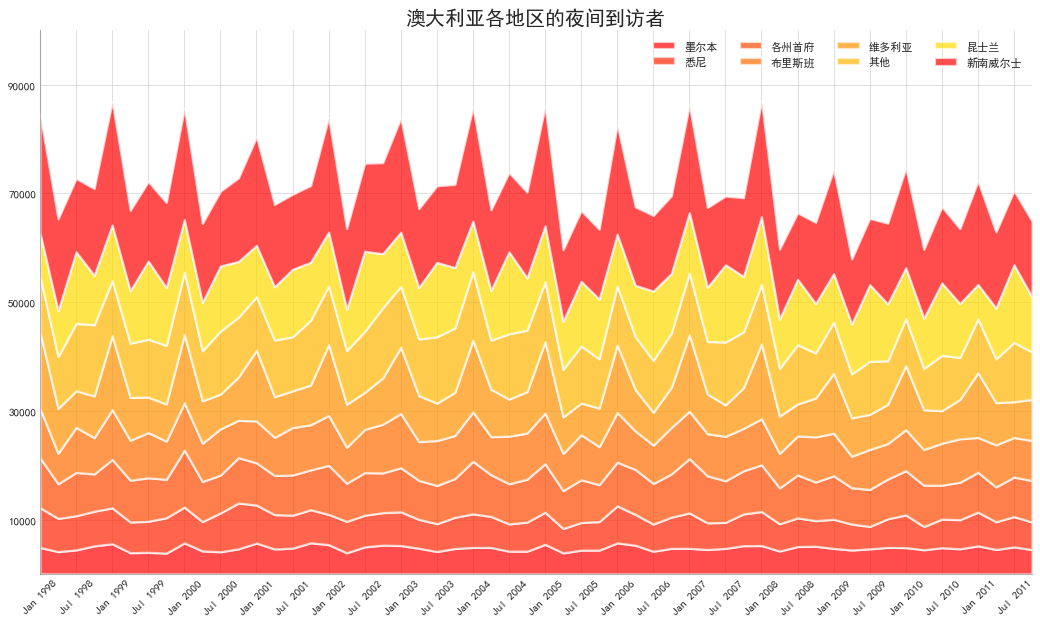

In [54]:
#装饰图像
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False
ax.set_title('澳大利亚各地区的夜间到访者', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])
plt.grid(alpha=0.7)

#设置坐标轴
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

In [12]:
df.describe()

,悉尼,新南威尔士,墨尔本,维多利亚,布里斯班,昆士兰,各州首府,其他
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,5731.732143,15842.625000,4722.107143,8595.803571,7781.142857,10600.535714,7698.857143,10283.196429
std,791.418898,2982.615146,513.448614,2588.076818,960.512371,1943.448855,881.024763,1339.630145
min,4118.000000,11967.000000,3825.000000,5800.000000,5616.000000,6335.000000,6252.000000,7583.000000
25%,5214.250000,13885.500000,4375.250000,6827.500000,7037.250000,9330.750000,7099.500000,9509.250000
50%,5709.000000,14728.500000,4699.000000,7524.500000,7778.000000,9955.000000,7617.000000,10251.000000
75%,6195.500000,17239.250000,5104.500000,9296.500000,8493.500000,11900.500000,8007.500000,11209.000000
max,8426.000000,22718.000000,5724.000000,14071.000000,9970.000000,15078.000000,10484.000000,13098.000000


### 5. 解读图像

2008年以前，一月的夜晚到访人数一直压制其他各月，但2008年之后7月的数据逐渐走高，到了2011年仿佛7月与1月的数据已经逐渐相同了。

面积图有什么优点？
> 能够展现出一般的折线图无法展现的组合情况  
> 能够分析出不同数据的叠加效应，使原本不太明显的趋势看起来更加明显

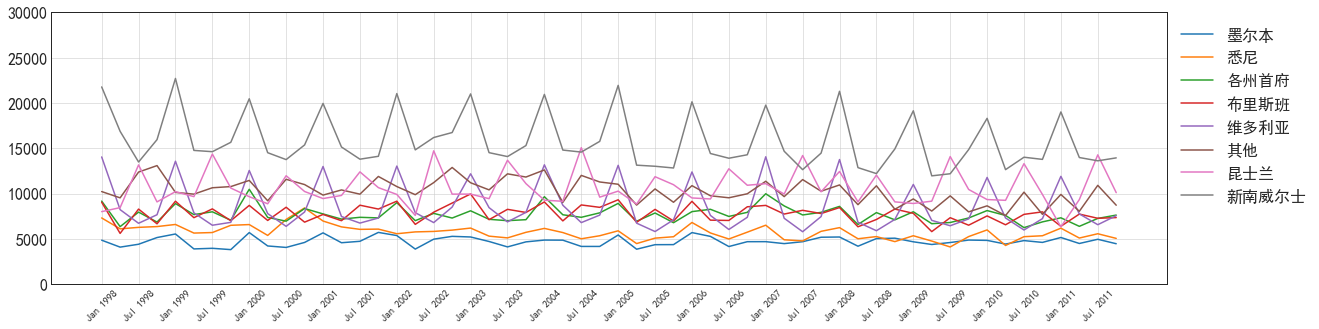

In [56]:
plt.figure(figsize=[20,5])
for label in y.columns:
    plt.plot(x,y.loc[:,label],label=label)
plt.xticks([])
plt.ylim(0,30000)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.grid(alpha=0.7);

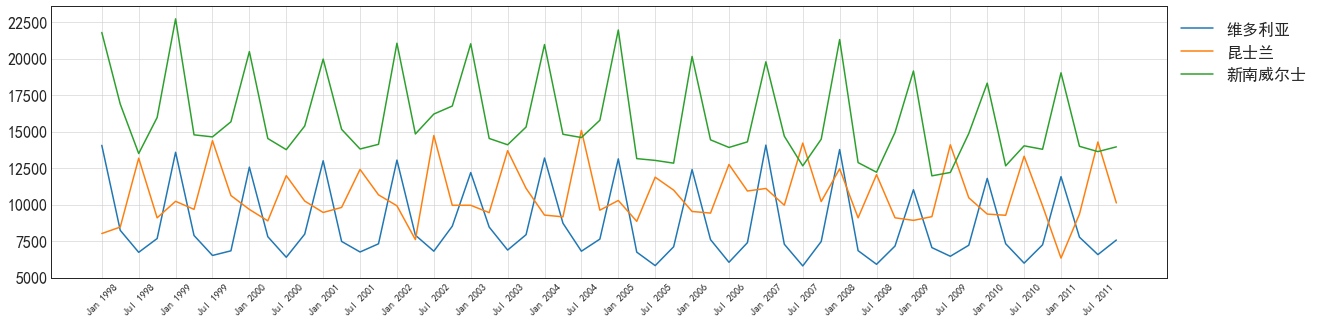

In [69]:
plt.figure(figsize=[20,5])
for label in ["维多利亚","昆士兰","新南威尔士"]:
    plt.plot(x,y.loc[:,label],label=label)
plt.xticks([])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.grid(alpha=0.7);

你是否注意到：维多利亚和新南威尔士的趋势一模一样，但是昆士兰的趋势却几乎和剩下两者相反  
事实上，在我们这个数据集的地名当中，悉尼，墨尔本和布里斯班是城市名称，而维多利亚，昆士兰和新南威尔士是大洲名称（相当于中国的省）  
其中维多利亚和新南威尔士是澳大利亚政治经济集中的地区，而昆士兰是澳大利亚著名的旅游胜地  
澳大利亚最著名的景点：大堡礁，黄金海岸，白化珊瑚，凯恩斯的热气球，漂流，跳伞活动等等都在昆士兰地区

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1599200409573&di=e1031827b4fc8256c5417d314f950451&imgtype=0&src=http%3A%2F%2Fkj.eurasia.edu%2Fres_base%2Fkuaiji_com_www%2Fupload%2Farticle%2Fimage%2F2017_3%2F9_1%2Ft2z0j71jv9ni.jpg" align="center" />

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1555763551675&di=ed9f8119fdaf309061b078fe5f194610&imgtype=0&src=http%3A%2F%2Fimages.shobserver.com%2Fnews%2Fnews%2F2017%2F1%2F7%2Fdca19bdf-ac33-4032-a031-6bf58fefb799.jpg" align="center" />


<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1556358329&di=d04d3885c416c4ee3a599563b25e2c86&imgtype=jpg&er=1&src=http%3A%2F%2Fcdn2.ettoday.net%2Fimages%2F2449%2F2449180.jpg" align="center" />

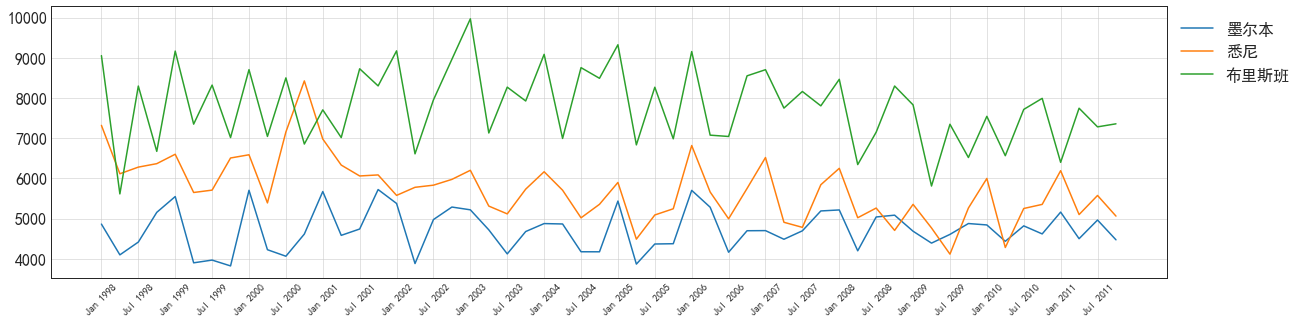

In [60]:
plt.figure(figsize=[20,5])
for label in ["墨尔本","悉尼","布里斯班"]:
    plt.plot(x,y.loc[:,label],label=label)
plt.xticks([])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.grid(alpha=0.7);

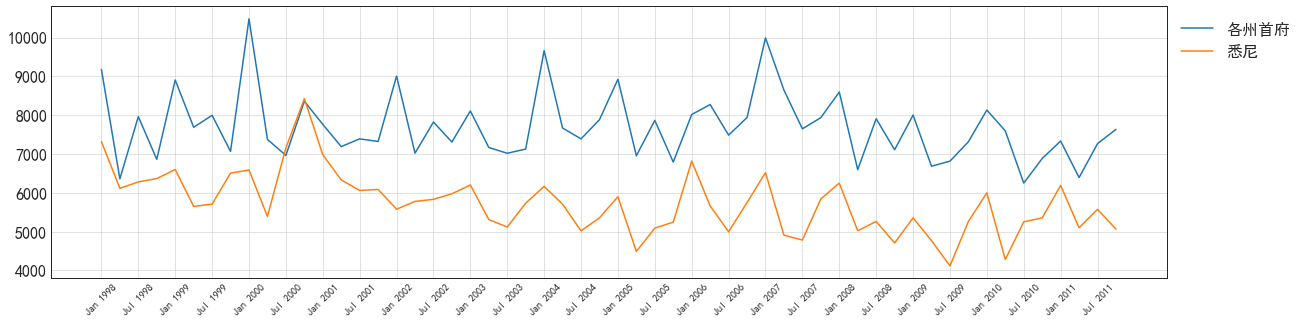

In [62]:
plt.figure(figsize=[20,5])
for label in ["各州首府","悉尼"]:
    plt.plot(x,y.loc[:,label],label=label)
plt.xticks([])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.grid(alpha=0.7);

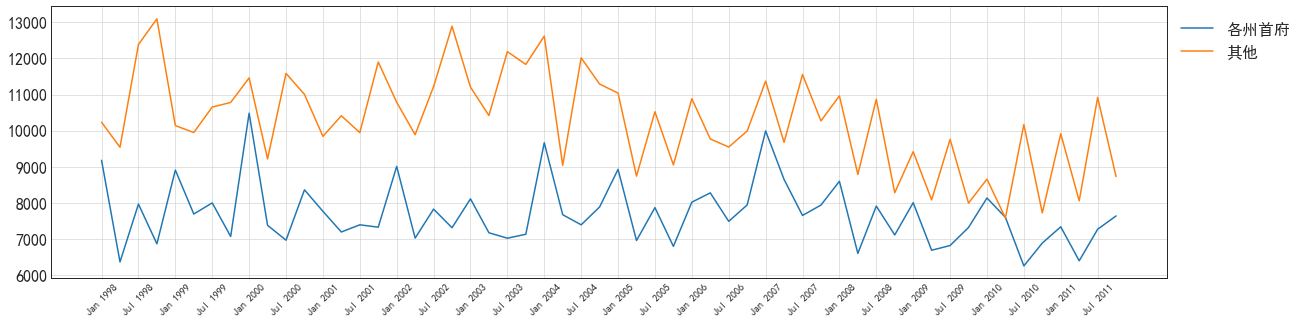

In [68]:
plt.figure(figsize=[20,5])
for label in ["各州首府","其他"]:
    plt.plot(x,y.loc[:,label],label=label)
plt.xticks([])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xticks(x[::2], rotation=45, fontsize=10, horizontalalignment='center')
plt.grid(alpha=0.7);

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 45/50 日历热力图

下面这个仿佛是华夫饼图一样的带格子的，并且没有横纵坐标的图像，叫做日历热力图。  
日历热力图是一种除了横坐标为时间的折线图之外的，展示一个变量如何随着时间变化的图像。  
通常来说，如果能够使用折线图，我们不会选择日历热力图，毕竟它无法表达出趋势，而且对数值的表现其实并不明显。  
不过相比于折线图，热力图在视觉上可能更吸引人，它可以很快展示出极端值，还可以体现出假日带来的影响。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/45.PNG" align="center" />

### 1. 导入需要的模块和库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 绘制日历热力图的库与数据

#### calmap.calenderplot()

> 这是一个天生了解日期的函数，我们只需要输入日期，它自动了解年月日星期几这些信息  
> 颜色越深，代表这一天的数值越高

In [108]:
%%cmd
pip install calmap

Microsoft Windows [Version 10.0.17134.706]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Pythonwork\micro-class 2 - virtualization\week7>pip install calmap

C:\Pythonwork\micro-class 2 - virtualization\week7>

In [109]:
import matplotlib as mpl
import calmap

In [131]:
#导入数据集
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])

In [132]:
df.head() #这是一个股票数据集

,date,VIX.Open,VIX.High,VIX.Low,VIX.Close,VIX.Volume,VIX.Adjusted,year,month,monthf,weekday,weekdayf,week
0,2007-01-03,12.16,12.75,11.53,12.04,0,12.04,2007,1,Jan,3,Wed,1
1,2007-01-04,12.40,12.42,11.28,11.51,0,11.51,2007,1,Jan,4,Thu,1
2,2007-01-05,11.84,12.25,11.68,12.14,0,12.14,2007,1,Jan,5,Fri,1
3,2007-01-08,12.48,12.83,11.78,12.00,0,12.00,2007,1,Jan,1,Mon,2
4,2007-01-09,11.86,12.47,11.69,11.91,0,11.91,2007,1,Jan,2,Tue,2


In [115]:
df.set_index('date', inplace=True) #设置date为新的索引

### 4. 绘制图像&解读图像

C:\Python\lib\site-packages\calmap\__init__.py:221: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


<Figure size 1280x800 with 0 Axes>

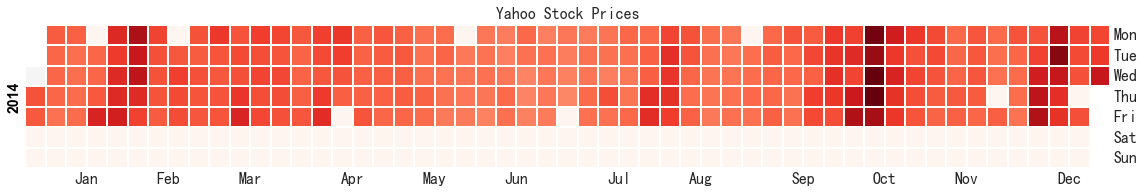

In [128]:
#绘制图像
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(data = df["2014"]["VIX.Close"] #需要输入的数据，必须是一个以datetime时间为索引的数据集  
                    , fig_kws={'figsize': (16,10)} #画布相关的一系列属性
                    , yearlabel_kws={'color':'black', 'fontsize':14} #字体相关的一系列属性
                    , subplot_kws={'title':'Yahoo Stock Prices'}); #子图相关的一系列属性

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 46/50 季节图

季节图的本质其实就是多条折现的折线图，不过它不同于我们曾绘制的多纵坐标轴的折线图。  
在多纵坐标轴的折现图中，每一条折线代表的属性不同，但他们之间也许是相关的，本质是为了查看两个不同变量之间的关系。  
但在季节图中，多条折现所展现的数据性质本质是一致的，比如说下面这张典型的季节图，展现的是不同年份同一季节的同一属性：空乘人数，图像的本质是对比不同年份中同一月份的属性的差异。  
所以季节图，可以说是一种偏差图像。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/46%20-%20.PNG" align="center" />

横坐标：月份  
纵坐标：空乘人数  
颜色：不同年份

### 1. 导入需要的模块和库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，处理数据

In [149]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [150]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


首先要确定，我们需要多少条折线——即，数据集中总共有多少年？

#### dateutil.parser.parse：将字符串时间处理成datetime.datetime格式

In [ ]:
from dateutil.parser import parse

In [145]:
df.date[0]

'1949-01-01'

In [146]:
parse(df.date[0]).year

1949

In [151]:
df['year'] = [parse(d).year for d in df.date]

In [152]:
df.head()

,date,value,year
0,1949-01-01,112,1949
1,1949-02-01,118,1949
2,1949-03-01,132,1949
3,1949-04-01,129,1949
4,1949-05-01,121,1949


In [178]:
parse(df.date[0]).strftime('%b') #取出月份并且转换为英文简称

'Jan'

In [179]:
df['month'] = [parse(d).strftime('%b') for d in df.date]

In [180]:
df.head()

,date,value,year,month
0,1949-01-01,112,1949,Jan
1,1949-02-01,118,1949,Feb
2,1949-03-01,132,1949,Mar
3,1949-04-01,129,1949,Apr
4,1949-05-01,121,1949,May


In [181]:
years = df['year'].unique()

In [182]:
years

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

### 3. 绘制图像

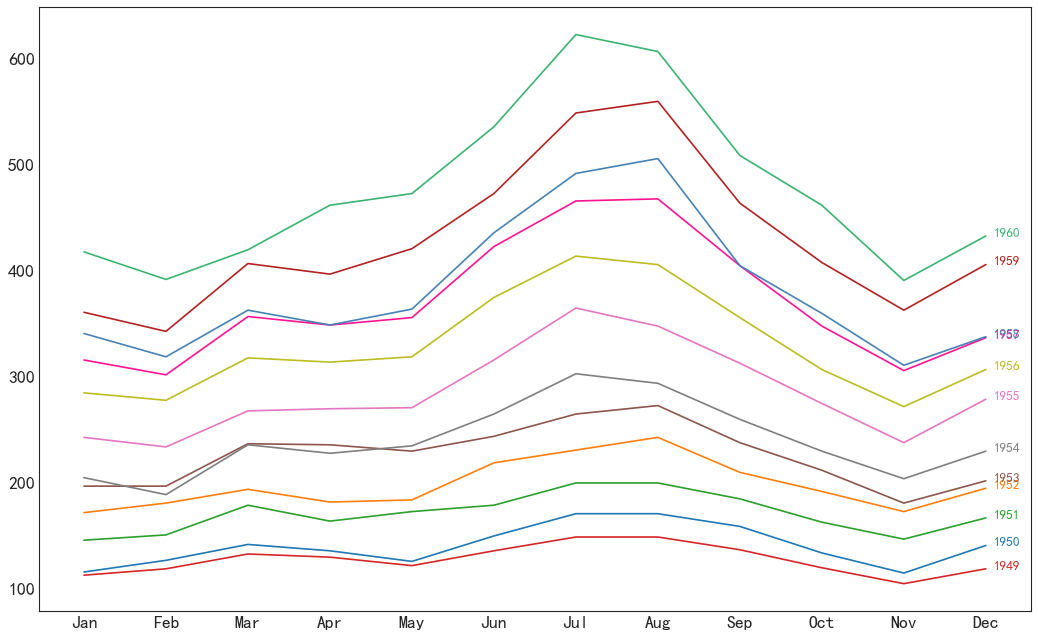

In [212]:
#定义颜色
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      

#绘制图像
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(years): #对每一年进行循环，一年一条折线地进行绘图
    plt.plot("month","value"
             ,data = df.loc[df.year==y,:]
             , color=mycolors[i]
             , label=y
            )
    #在每一年的右侧写上文字
    plt.text(df.loc[df.year==y, :].shape[0]-0.9 #横坐标：是所有那一年的样本的总数 - 0.9
             , df.loc[df.year==y, 'value'].values[-1] #纵坐标，和每一年12月的值在同一高度
             , y #需要写的文字：年份
             , fontsize=12, color=mycolors[i])

In [189]:
df.loc[df.year==1949, :].shape[0] #而横坐标是从0~11这样的索引，所以12其实是超出了图像的边界的，来看看如果没有-0.9文字在哪里

12

In [211]:
df.loc[df.year==1949, 'value'].values[-1] #得到最后一个值

118

In [206]:
df.loc[df.year==1949, 'value'][len(df.loc[df.year==1949, 'value'])-1] #或者这样

118

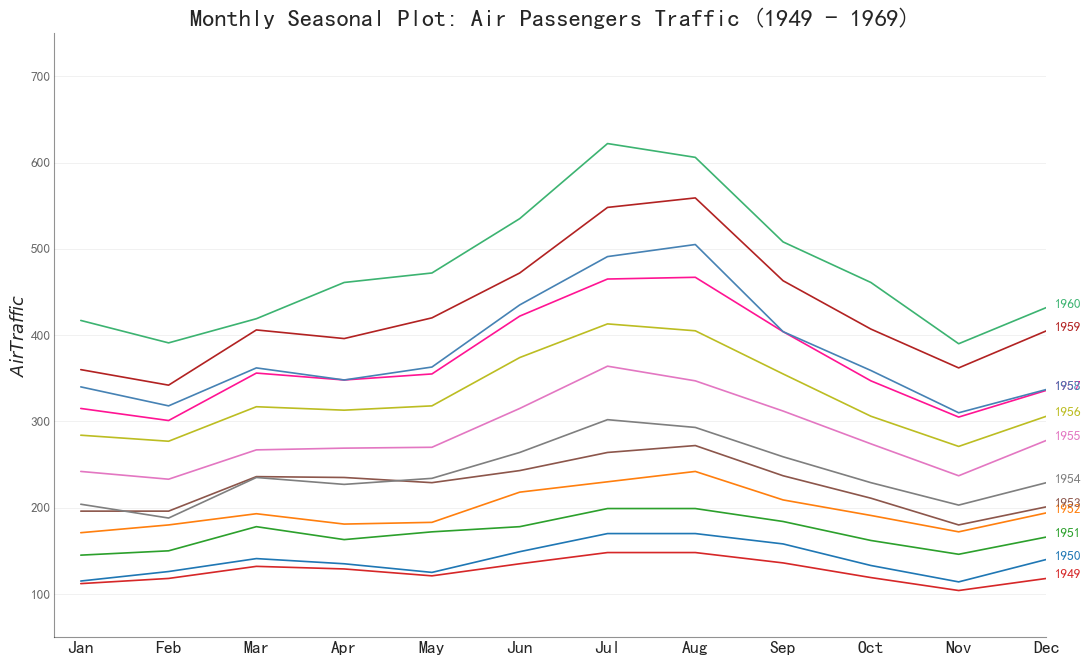

In [216]:
plt.figure(figsize=(16,10), dpi= 80)
for i, y in enumerate(years):
    plt.plot("month","value",data = df.loc[df.year==y,:], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-0.9, df.loc[df.year==y, 'value'].values[-1], y, fontsize=12, color=mycolors[i])

#装饰图像
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$') #这里的$让字体变成斜体
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

#将部分坐标轴隐藏
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
#plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

### 4. 图像解读

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />